juego de encotrar un tesoro donde un agente(jugador) que aprende a encontrar un tesoro en un entorno de cuadrícula con obstaculos.
En este ejemplo, utilizaremos una representación de cuadrícula  y mostraremos cómo el agente aprende la política óptima para encontrar un tesoro

In [10]:
import numpy as np
import random
import time

Entorno = np.array([
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
])
estado_inicial = (0, 0)

estado_objetivo = (9, 9)
# Parámetros de Q-Learning
num_estados = Entorno.shape

num_acciones = 4
alpha = 0.6  # Tasa de aprendizaje
gamma = 0.9  # Factor de descuento
epsilon_inicial = 1.0  # Valor inicial de epsilon
epsilon_minimo = 0.1  # Valor mínimo de epsilon
num_episodios_decaimiento = 50  # epsilon se reduce gradualmente

# Inicializar la tabla de valores Q
Q = np.zeros((num_estados[0], num_estados[1], num_acciones))
#print("Tabla Q inicial:")
#print(Q)
# Función epsilon-greedy para seleccionar acciones
def seleccionar_accion(estado, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(num_acciones))
    else:
        return np.argmax(Q[estado[0], estado[1]])

# Función para mover al agente en el entorno
def mover_agente(estado, accion):
    if accion == 0:  # Mover hacia arriba
        nuevo_estado = max(estado[0] - 1, 0), estado[1]
    elif accion == 1:  # Mover hacia abajo
        nuevo_estado = min(estado[0] + 1, num_estados[0] - 1), estado[1]
    elif accion == 2:  # Mover a la izquierda
        nuevo_estado = estado[0], max(estado[1] - 1, 0)
    elif accion == 3:  # Mover a la derecha
        nuevo_estado = estado[0], min(estado[1] + 1, num_estados[1] - 1)
    # Si el nuevo estado es una agujero, no mover al agente
    if Entorno[nuevo_estado[0], nuevo_estado[1]] == 1:
        return estado
    return nuevo_estado
# Función para imprimir el entorno
def imprimir_entorno(estado):
    laberinto_visual = np.copy(Entorno)
    laberinto_visual[estado[0], estado[1]] = 2  # Marcar la posición actual del jugador
    for fila in laberinto_visual:

        print(''.join(['O' if cell == 1 else 'J' if cell == 2 else  ' ' for cell in fila]))
import matplotlib.pyplot as plt
from IPython.display import clear_output

def dibujar_entorno(estado):

    entorno_visual = np.copy(Entorno)
    entorno_visual[estado[0], estado[1]] = 2  # Marcar la posición actual del jugador
    entorno_visual[estado_objetivo[0], estado_objetivo[1]] = 3  # Marcar la posición del objetivo(tesoro)

    time.sleep(0.4)
    clear_output(wait=True)  # Borra la salida de la celda
    plt.imshow(entorno_visual, cmap='plasma', vmin=0, vmax=3)  # Especifica el rango de valores para el cmap
    plt.show()


In [11]:
num_episodios = 1000
epsilon = epsilon_inicial
for episodio in range(num_episodios):
    estado = estado_inicial

    while estado != estado_objetivo:
        accion = seleccionar_accion(estado, epsilon)
        nueva_estado = mover_agente(estado, accion)
        # Calcular la recompensa
        if Entorno[nueva_estado[0], nueva_estado[1]] == 1:
            recompensa = -100  # Penalización alta

        elif nueva_estado == estado_objetivo:  # Objetivo
            recompensa = 100
        else:
            recompensa = -1

        Q[estado[0], estado[1], accion] += alpha * (recompensa + gamma * np.max(Q[nueva_estado[0], nueva_estado[1]])\
             - Q[estado[0], estado[1], accion])
        estado = nueva_estado

        imprimir_entorno(estado)  # Imprimir el entorno en cada paso

    # Decaimiento de epsilon después de cada episodio
    if episodio < num_episodios_decaimiento:
        epsilon -= (epsilon_inicial - epsilon_minimo) / num_episodios_decaimiento
    else:
        epsilon = epsilon_minimo

Se han truncado las últimas 5000 líneas del flujo de salida.
     O    
 OO  O OO 
JOO    OO 
 OO OO    
    OO OO 
    OO    
 OO    OO 
 OO       
    OOO   
OOO       
     O    
 OO  O OO 
 OO    OO 
JOO OO    
    OO OO 
    OO    
 OO    OO 
 OO       
    OOO   
OOO       
     O    
 OO  O OO 
 OO    OO 
 OO OO    
J   OO OO 
    OO    
 OO    OO 
 OO       
    OOO   
OOO       
     O    
 OO  O OO 
 OO    OO 
 OO OO    
 J  OO OO 
    OO    
 OO    OO 
 OO       
    OOO   
OOO       
     O    
 OO  O OO 
 OO    OO 
 OO OO    
  J OO OO 
    OO    
 OO    OO 
 OO       
    OOO   
OOO       
     O    
 OO  O OO 
 OO    OO 
 OO OO    
    OO OO 
  J OO    
 OO    OO 
 OO       
    OOO   
OOO       
     O    
 OO  O OO 
 OO    OO 
 OO OO    
    OO OO 
   JOO    
 OO    OO 
 OO       
    OOO   
OOO       
     O    
 OO  O OO 
 OO    OO 
 OO OO    
    OO OO 
    OO    
 OOJ   OO 
 OO       
    OOO   
OOO       
     O    
 OO  O OO 
 OO    OO 
 OO OO    
    OO OO 
    

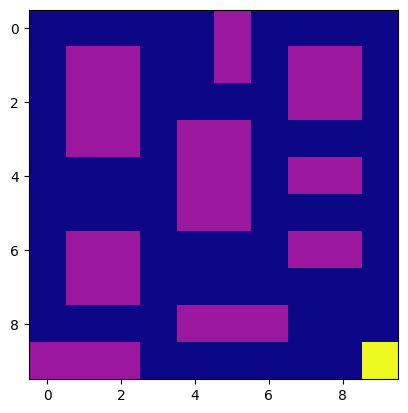

Jugador encontro el tesoro: (9, 9)


In [14]:
# Función para obtener la dirección a partir del número de acción
def obtener_direccion(accion):
    if accion == 0:
        return "arriba"
    elif accion == 1:
        return "abajo"
    elif accion == 2:
        return "izquierda"
    elif accion == 3:
        return "derecha"
    else:
        return "acción desconocida"

# Inicia el bucle while con el estado inicial
estado = estado_inicial
while estado != estado_objetivo:
    accion = seleccionar_accion(estado, epsilon_minimo)
    nueva_estado = mover_agente(estado, accion)
    if Entorno[nueva_estado[0], nueva_estado[1]] != 1:
        dibujar_entorno(estado)
        direccion = obtener_direccion(accion)
        print(f"Jugador se mueve de {estado} a {nueva_estado} {direccion}")
        estado = nueva_estado

    else:
        print(f"Jugador intenta moverse de {estado} a {nueva_estado}, pero hay una pared")

# Imprime el último estado (estado_objetivo)
dibujar_entorno(estado_objetivo)
print(f"Jugador encontro el tesoro: {estado_objetivo}")